# Spotify lab, vol. 2

Since the data harvesting is nicely plodding along in the other notebook, I'm starting a new one to get the clustering going. I save the data there to songs.csv, so I'll have to get that into here first. 

In [24]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import sleep
import requests
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from random import randint
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
from sklearn.metrics import silhouette_score


In [2]:
songs = pd.read_csv("songs.csv", sep = "|")

In [10]:
#songs

In [6]:
# Some minimal cleaning (I should have put "drop = True" into my function before - keep adding new indexes)
songs = songs.drop(columns = ["Unnamed: 0", "level_0", "index", "index.1"]).copy()

In [9]:
#songs

## On to the clustering!

### First, finding the right value for k

In [17]:
# I need to filter out the non-numeric data first.
songsnum = songs.select_dtypes(include = np.number)

In [19]:
#songsnum

In [27]:
K = range(2, 20)
inertia = []
silhouette = []


for k in K:
    kmeans = cluster.KMeans(n_clusters=k,
                    random_state=1989)
    kmeans.fit(songsnum)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(songsnum, kmeans.predict(songsnum)))



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

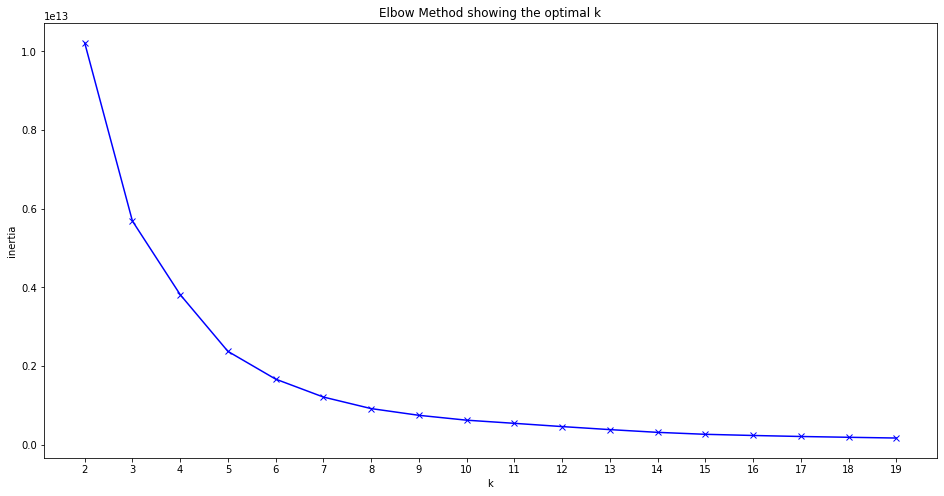

In [28]:
# Show the elbow graph thing
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

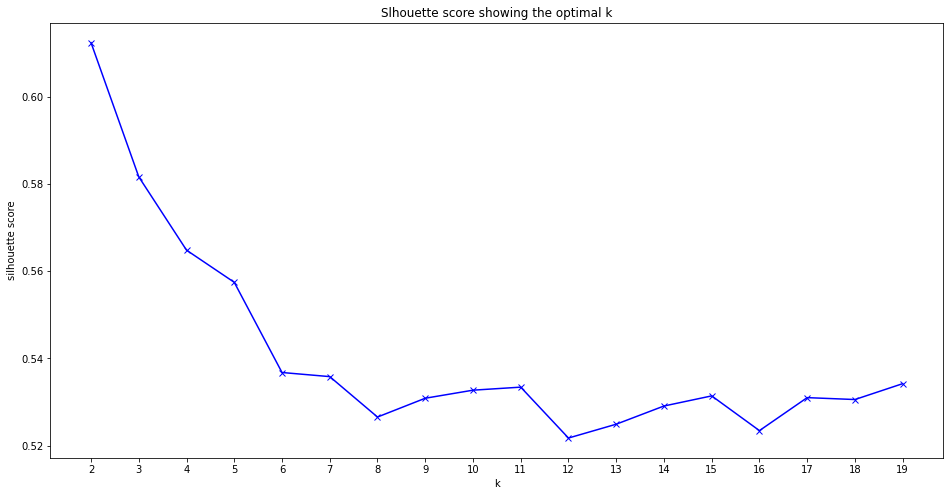

In [30]:
# Show the silhouette score
plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

Based on these graphs (and a conversation with Erin), I'm going to go with 5 clusters. 

### Next, assigning clusters to my songs

In [33]:
kmeans = cluster.KMeans(n_clusters=5, random_state=1989)
kmeans.fit(songsnum)

KMeans(n_clusters=5, random_state=1989)

In [34]:
clusters = kmeans.predict(songsnum)


In [35]:
clusters

array([1, 1, 2, ..., 0, 0, 0], dtype=int32)

In [36]:
len(clusters)

3696

Append these to my dataframe

In [37]:
songs['cluster'] = clusters

In [38]:
songs

,titles,artists,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,valence,tempo,type,id,uri.1,track_href,analysis_url,duration_ms,time_signature,cluster
0,All Star,Smash Mouth,spotify:track:3cfOd4CMv2snFaKAnMdnvK,0.731,0.867,11.0,-5.881,1.0,0.0320,0.039500,...,0.776,104.019,audio_features,3cfOd4CMv2snFaKAnMdnvK,spotify:track:3cfOd4CMv2snFaKAnMdnvK,https://api.spotify.com/v1/tracks/3cfOd4CMv2sn...,https://api.spotify.com/v1/audio-analysis/3cfO...,200373.0,4.0,1
1,Sk8er Boi,Avril Lavigne,spotify:track:00Mb3DuaIH1kjrwOku9CGU,0.487,0.900,0.0,-4.417,1.0,0.0482,0.000068,...,0.484,149.937,audio_features,00Mb3DuaIH1kjrwOku9CGU,spotify:track:00Mb3DuaIH1kjrwOku9CGU,https://api.spotify.com/v1/tracks/00Mb3DuaIH1k...,https://api.spotify.com/v1/audio-analysis/00Mb...,204000.0,4.0,1
2,What's My Age Again?,blink-182,spotify:track:4LJhJ6DQS7NwE7UKtvcM52,0.391,0.951,6.0,-7.419,1.0,0.0692,0.012600,...,0.468,157.660,audio_features,4LJhJ6DQS7NwE7UKtvcM52,spotify:track:4LJhJ6DQS7NwE7UKtvcM52,https://api.spotify.com/v1/tracks/4LJhJ6DQS7Nw...,https://api.spotify.com/v1/audio-analysis/4LJh...,148360.0,4.0,2
3,A Thousand Miles,Vanessa Carlton,spotify:track:4w1lzcaoZ1IC2K5TwjalRP,0.560,0.825,11.0,-3.862,1.0,0.0379,0.323000,...,0.268,94.931,audio_features,4w1lzcaoZ1IC2K5TwjalRP,spotify:track:4w1lzcaoZ1IC2K5TwjalRP,https://api.spotify.com/v1/tracks/4w1lzcaoZ1IC...,https://api.spotify.com/v1/audio-analysis/4w1l...,237493.0,4.0,1
4,Welcome to the Black Parade,My Chemical Romance,spotify:track:5wQnmLuC1W7ATsArWACrgW,0.217,0.905,2.0,-4.103,1.0,0.0752,0.000289,...,0.236,96.950,audio_features,5wQnmLuC1W7ATsArWACrgW,spotify:track:5wQnmLuC1W7ATsArWACrgW,https://api.spotify.com/v1/tracks/5wQnmLuC1W7A...,https://api.spotify.com/v1/audio-analysis/5wQn...,311107.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3691,Hold My Hand,Hootie & The Blowfish,spotify:track:4WnYuVFXe6Si4fZqkxbnvS,0.220,0.769,11.0,-5.125,1.0,0.0540,0.208000,...,0.495,170.773,audio_features,4WnYuVFXe6Si4fZqkxbnvS,spotify:track:4WnYuVFXe6Si4fZqkxbnvS,https://api.spotify.com/v1/tracks/4WnYuVFXe6Si...,https://api.spotify.com/v1/audio-analysis/4WnY...,258333.0,4.0,1
3692,Hannah Jane,Hootie & The Blowfish,spotify:track:29lgEr4woiquPUxUj16lqK,0.498,0.943,7.0,-5.514,1.0,0.0545,0.009230,...,0.618,124.819,audio_features,29lgEr4woiquPUxUj16lqK,spotify:track:29lgEr4woiquPUxUj16lqK,https://api.spotify.com/v1/tracks/29lgEr4woiqu...,https://api.spotify.com/v1/audio-analysis/29lg...,213893.0,4.0,1
3693,Time,Hootie & The Blowfish,spotify:track:1N0UflnZhn7xOkrN2l8zxx,0.387,0.875,2.0,-5.741,1.0,0.0385,0.037300,...,0.238,105.100,audio_features,1N0UflnZhn7xOkrN2l8zxx,spotify:track:1N0UflnZhn7xOkrN2l8zxx,https://api.spotify.com/v1/tracks/1N0UflnZhn7x...,https://api.spotify.com/v1/audio-analysis/1N0U...,296840.0,4.0,0
3694,Real Love,Mary J. Blige,spotify:track:3XG801WWhqC753dekEBkMt,0.769,0.781,0.0,-5.472,1.0,0.0797,0.119000,...,0.826,95.020,audio_features,3XG801WWhqC753dekEBkMt,spotify:track:3XG801WWhqC753dekEBkMt,https://api.spotify.com/v1/tracks/3XG801WWhqC7...,https://api.spotify.com/v1/audio-analysis/3XG8...,269973.0,4.0,0


I can already see that My Chemical Romance and Mary J. Blige end up in the same cluster - sure...

## Recap for previous lab

I need to re-load my 'hot songs' from the previous lab as well, before I can make the recommender work.

In [39]:
hotsongs = pd.read_csv("hotsongs.csv", sep = "|")

# The recommender (take 2)

In [90]:
def recommender():
    song = input("Enter song title: ")
    if song in hotsongs['Title'].unique():
        number = random.randint(0,len(hotsongs))
        
        return hotsongs.iloc[number]

    else: 
        # Authenticate connection
        secrets = open("secrets.txt", "r")
        a = secrets.read()
        a = a.split("\n")
        cl_id = a[0]
        cl_sec = a[1]
        sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=cl_id,
                                                          client_secret=cl_sec))
        #Todo: what if the song title does not exist? See what error spotify throws and make an except for that.
        
        # Search for song and store the data in a frame 
        results = sp.search(q=song, limit=1)
        title = results['tracks']['items'][0]['name']
        artist = results['tracks']['items'][0]['artists'][0]['name']
        uri = results['tracks']['items'][0]['uri']

        songdata = pd.DataFrame(data = {'titles': title, 'artists': artist, 'uri': uri}, index = [0])
        
        # Get features, and normalize into a dataframe
        features = sp.audio_features(uri)
        featuresdata = pd.json_normalize(features)
        featuresdata_num = featuresdata.select_dtypes(include = np.number)
        
#         # Concatenate the two dataframes
#         songwithfeatures = pd.concat([songdata, featuresdata], axis = 1)
        
        
        print(kmeans.predict(featuresdata_num))
        
    return kmeans.predict(featuresdata_num)

In [91]:
testsong = recommender()

Enter song title: out of step
[2]


### That works! The last tweak would be to pick a (random?) song from the big list of songs from the same cluster...